In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
print(df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [5]:
df.shape

(14999, 10)

In [6]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df['left'].value_counts()

0    11428
1     3571
Name: left, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

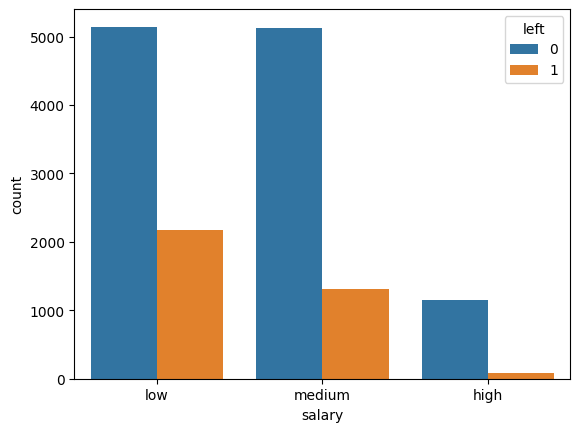

In [9]:
sns.countplot(x=df.salary,hue='left',data=df)

<AxesSubplot:xlabel='satisfaction_level', ylabel='count'>

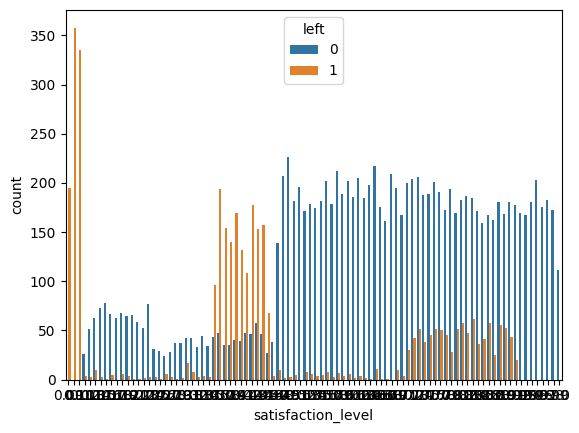

In [10]:
sns.countplot(x=df.satisfaction_level,hue='left',data=df)

In [11]:
#new_df=pd.get_dummies(new_df,prefix='Salary')new_df.head()

In [12]:
# first of all we should group it a/c to left and retained candidates to find relation with other columns
df_left=df[df.left==1]
df_left.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [13]:
df['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [14]:
# size decreased as it contained only candidate who left the department
df_left.shape
# so 3571 employees left the company

(3571, 10)

In [15]:
df_retained=df[df.left==0]
df_retained.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [16]:
df_retained.shape
# So 11428 employees retained in the company

(11428, 10)

In [17]:
# Now we will group the dataframe according to left and retained employees
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary', ylabel='count'>

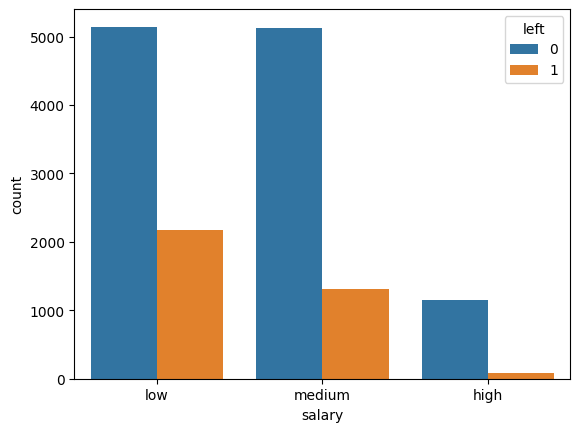

In [18]:
sns.countplot(x=df.salary,hue='left',data=df)

In [19]:
new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [20]:
# Converting salary column into numerals
new_df=pd.get_dummies(new_df,prefix='Salary')
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


<AxesSubplot:ylabel='average_montly_hours'>

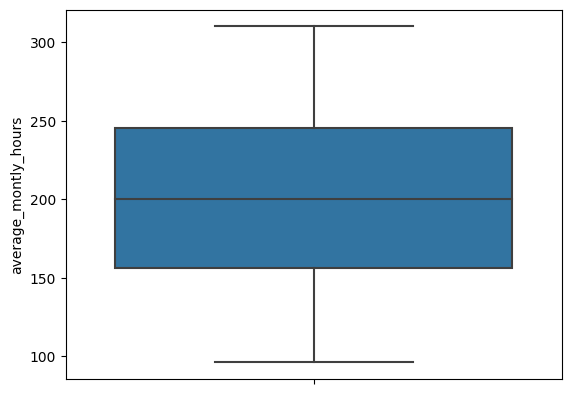

In [21]:
# Now if we look at the normality i think data is not normal.Let's check the outliers in the data.
sns.boxplot(y='average_montly_hours',data=new_df)

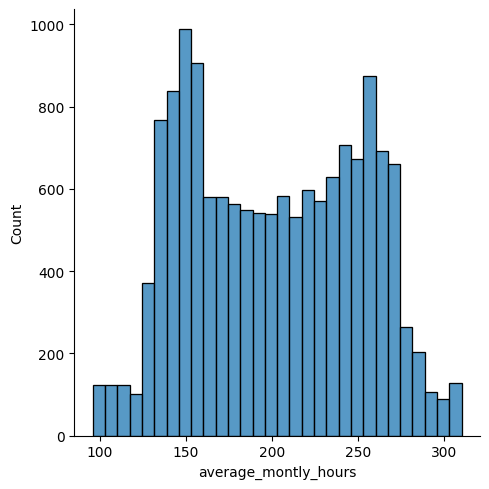

In [22]:
sns.displot(new_df['average_montly_hours'])   # It is not normal so lets normalize the data

In [25]:
# Log Transformation method
new_df['average_montly_hours']=np.log(new_df['average_montly_hours'])
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium
0,0.38,5.056246,0,0,1,0
1,0.80,5.568345,0,0,0,1
2,0.11,5.605802,0,0,0,1
3,0.72,5.407172,0,0,1,0
4,0.37,5.068904,0,0,1,0


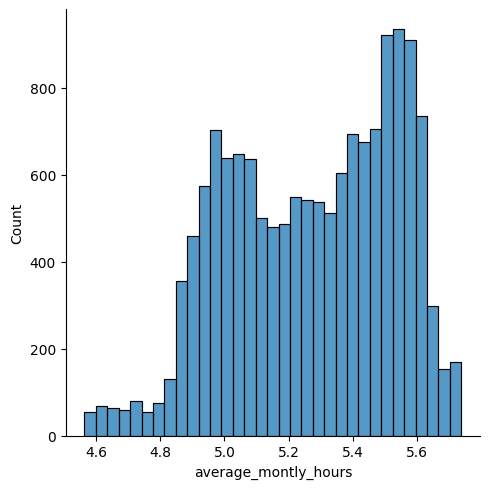

In [26]:
sns.displot(new_df['average_montly_hours'])   # It is not normal so lets normalize the data

In [27]:
# Simple feature scaling
new_df['average_montly_hours']=new_df['average_montly_hours']/new_df['average_montly_hours'].max()
new_df['average_montly_hours'].head()

0    0.881405
1    0.970675
2    0.977204
3    0.942579
4    0.883612
Name: average_montly_hours, dtype: float64

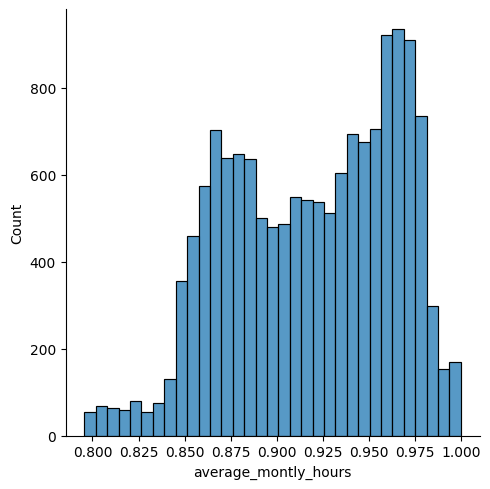

In [28]:
sns.displot(new_df['average_montly_hours'])   # It is not normal so lets normalize the data

In [29]:
new_df.head(3)

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium
0,0.38,0.881405,0,0,1,0
1,0.80,0.970675,0,0,0,1
2,0.11,0.977204,0,0,0,1


In [30]:
# x is feature or input so
x=new_df
x.head(3)

,satisfaction_level,average_montly_hours,promotion_last_5years,Salary_high,Salary_low,Salary_medium
0,0.38,0.881405,0,0,1,0
1,0.80,0.970675,0,0,0,1
2,0.11,0.977204,0,0,0,1


In [31]:
#  y is the output so
y=df.left
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression().fit(X_train,Y_train)
model

LogisticRegression()

In [34]:
# Testing the score/accuracy
print('Training data score is =',model.score(X_train,Y_train))
print('Testing  data score is =',model.score(X_test,Y_test))
print('Total data score =',model.score(x,y))

Training data score is = 0.7747312276023002
Testing  data score is = 0.7746666666666666
Total data score = 0.7747183145543036


In [35]:
# 
model.predict([[100,10,0,0,0,1]])

C:\Users\ASIF\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [36]:
pred_res=model.predict(X_test)
pred_res

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred_res)

0.7746666666666666